In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2

from keras.optimizers import Adam
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
import tensorflow as tf
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import os
import cv2
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/paddy-weed-research
!ls

Mounted at /content/drive
/content/drive/MyDrive/paddy-weed-research
isolated  segmentation	train_new  valid


Preparing datasets

In [ ]:
train_path = '/content/drive/MyDrive/paddy-weed-research/isolated/train'
valid_path = '/content/drive/MyDrive/paddy-weed-research/isolated/valid'
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(train_path,target_size=(64,64))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(valid_path, target_size=(64,64),shuffle = False)

Found 1957 images belonging to 4 classes.
Found 116 images belonging to 4 classes.


Using Resnet model builtin Keras with pretrained weights

In [ ]:
img_height,img_width = 64,64 
num_classes = 4
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
#adam = Adam(lr=0.00001)
model.compile(optimizer= optimizers.SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

Model training

In [ ]:

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='auto')

hist = model.fit_generator(generator=traindata,steps_per_epoch=39, validation_data= testdata,epochs=100,callbacks=[early])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
39/39 [==============================] - 556s 13s/step - loss: 2.3296 - accuracy: 0.3669 - val_loss: 37.4912 - val_accuracy: 0.1724
Epoch 2/100
39/39 [==============================] - 264s 7s/step - loss: 1.1967 - accuracy: 0.6012 - val_loss: 5.0323 - val_accuracy: 0.1897
Epoch 3/100
39/39 [==============================] - 179s 5s/step - loss: 0.7808 - accuracy: 0.7266 - val_loss: 1.1456 - val_accuracy: 0.6638
Epoch 4/100
39/39 [==============================] - 146s 4s/step - loss: 0.7472 - accuracy: 0.7404 - val_loss: 1.0354 - val_accuracy: 0.5603
Epoch 5/100
39/39 [==============================] - 135s 3s/step - loss: 0.4460 - accuracy: 0.8179 - val_loss: 0.9635 - val_accuracy: 0.6724
Epoch 6/100
39/39 [==============================] - 130s 3s/step - loss: 0.5567 - accuracy: 0.8331 - val_loss: 0.9968 - val_accuracy: 0.6983
Epoch 7/100
39/39 [==============================] - 131s 3s/step - loss: 0.3806 - accuracy: 0.8660 - val_loss: 0.9357 - val_accuracy: 0.7328
Epoc

Results for dataset 2

In [ ]:
Y_pred = model.predict_generator(testdata) 
y_pred = np.argmax(Y_pred, axis=1) 
print('Confusion Matrix') 
print(confusion_matrix(testdata.classes, y_pred)) 
print('Classification Report') 
target_names = ['Broad-leaved','Grass','Paddy','Sedges'] 
print(classification_report(testdata.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[16  3  2  2]
 [ 0 34  2  4]
 [ 0  0 20  0]
 [ 0  6  5 22]]
Classification Report
              precision    recall  f1-score   support

Broad-leaved       1.00      0.70      0.82        23
       Grass       0.79      0.85      0.82        40
       Paddy       0.69      1.00      0.82        20
      Sedges       0.79      0.67      0.72        33

    accuracy                           0.79       116
   macro avg       0.82      0.80      0.79       116
weighted avg       0.81      0.79      0.79       116



Results for dataset 1

In [ ]:
Y_pred = model.predict_generator(testdata) 
y_pred = np.argmax(Y_pred, axis=1) 
print('Confusion Matrix') 
print(confusion_matrix(testdata.classes, y_pred)) 
print('Classification Report') 
target_names = ['Broad-leaved','Grass','Sedges'] 
print(classification_report(testdata.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[37  2  0]
 [ 6 70  5]
 [ 2 19 30]]
Classification Report
              precision    recall  f1-score   support

Broad-leaved       0.82      0.95      0.88        39
       Grass       0.77      0.86      0.81        81
      Sedges       0.86      0.59      0.70        51

    accuracy                           0.80       171
   macro avg       0.82      0.80      0.80       171
weighted avg       0.81      0.80      0.79       171



In [ ]:
print(testdata.class_indices)

{'broad-leaved': 0, 'grass': 1, 'paddy': 2, 'sedges': 3}


In [ ]:
#SET1
#take a batch of dataset 
X,y = testdata.next()
prediction = model.predict(X)
print(X.shape)
print(y)#truelabel
print(prediction) #predictval

(32, 64, 64, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[9.99935269e-01 2.05115357e-05 4.42711716e-05]
 [9.99851823e-01 3.04737091e-06 1.45040642e-04]
 [9.99987125e-01 4.65141952e-08 1.29113114e-05]
 [9.99995232e-01 1.73809056e-07 4.60007777e-06]
 [9.99971747e-01 2.62208796e-05 1.96761835e-06]
 [9.99991775e-01 6.06715048e-06 2.20123115e-06]
 [9.99971747e-01 2.62208796e-05 1.96761835e-06]
 [9.06588376e-01 9.16067660e-02 1.80484552e-03]
 [1.00000000e+00 8.12925394e-10 7.03099401e-09]
 [9.90346372e-01 8.74770060e-03 9.06018482e-04]
 [1.00000000e+00 3.42940343e-10 9.89911531e-09]
 [2.23576024e-01 7.50320077e-01 2.61038020e-02]
 [1.82947917e-06 9.9980

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

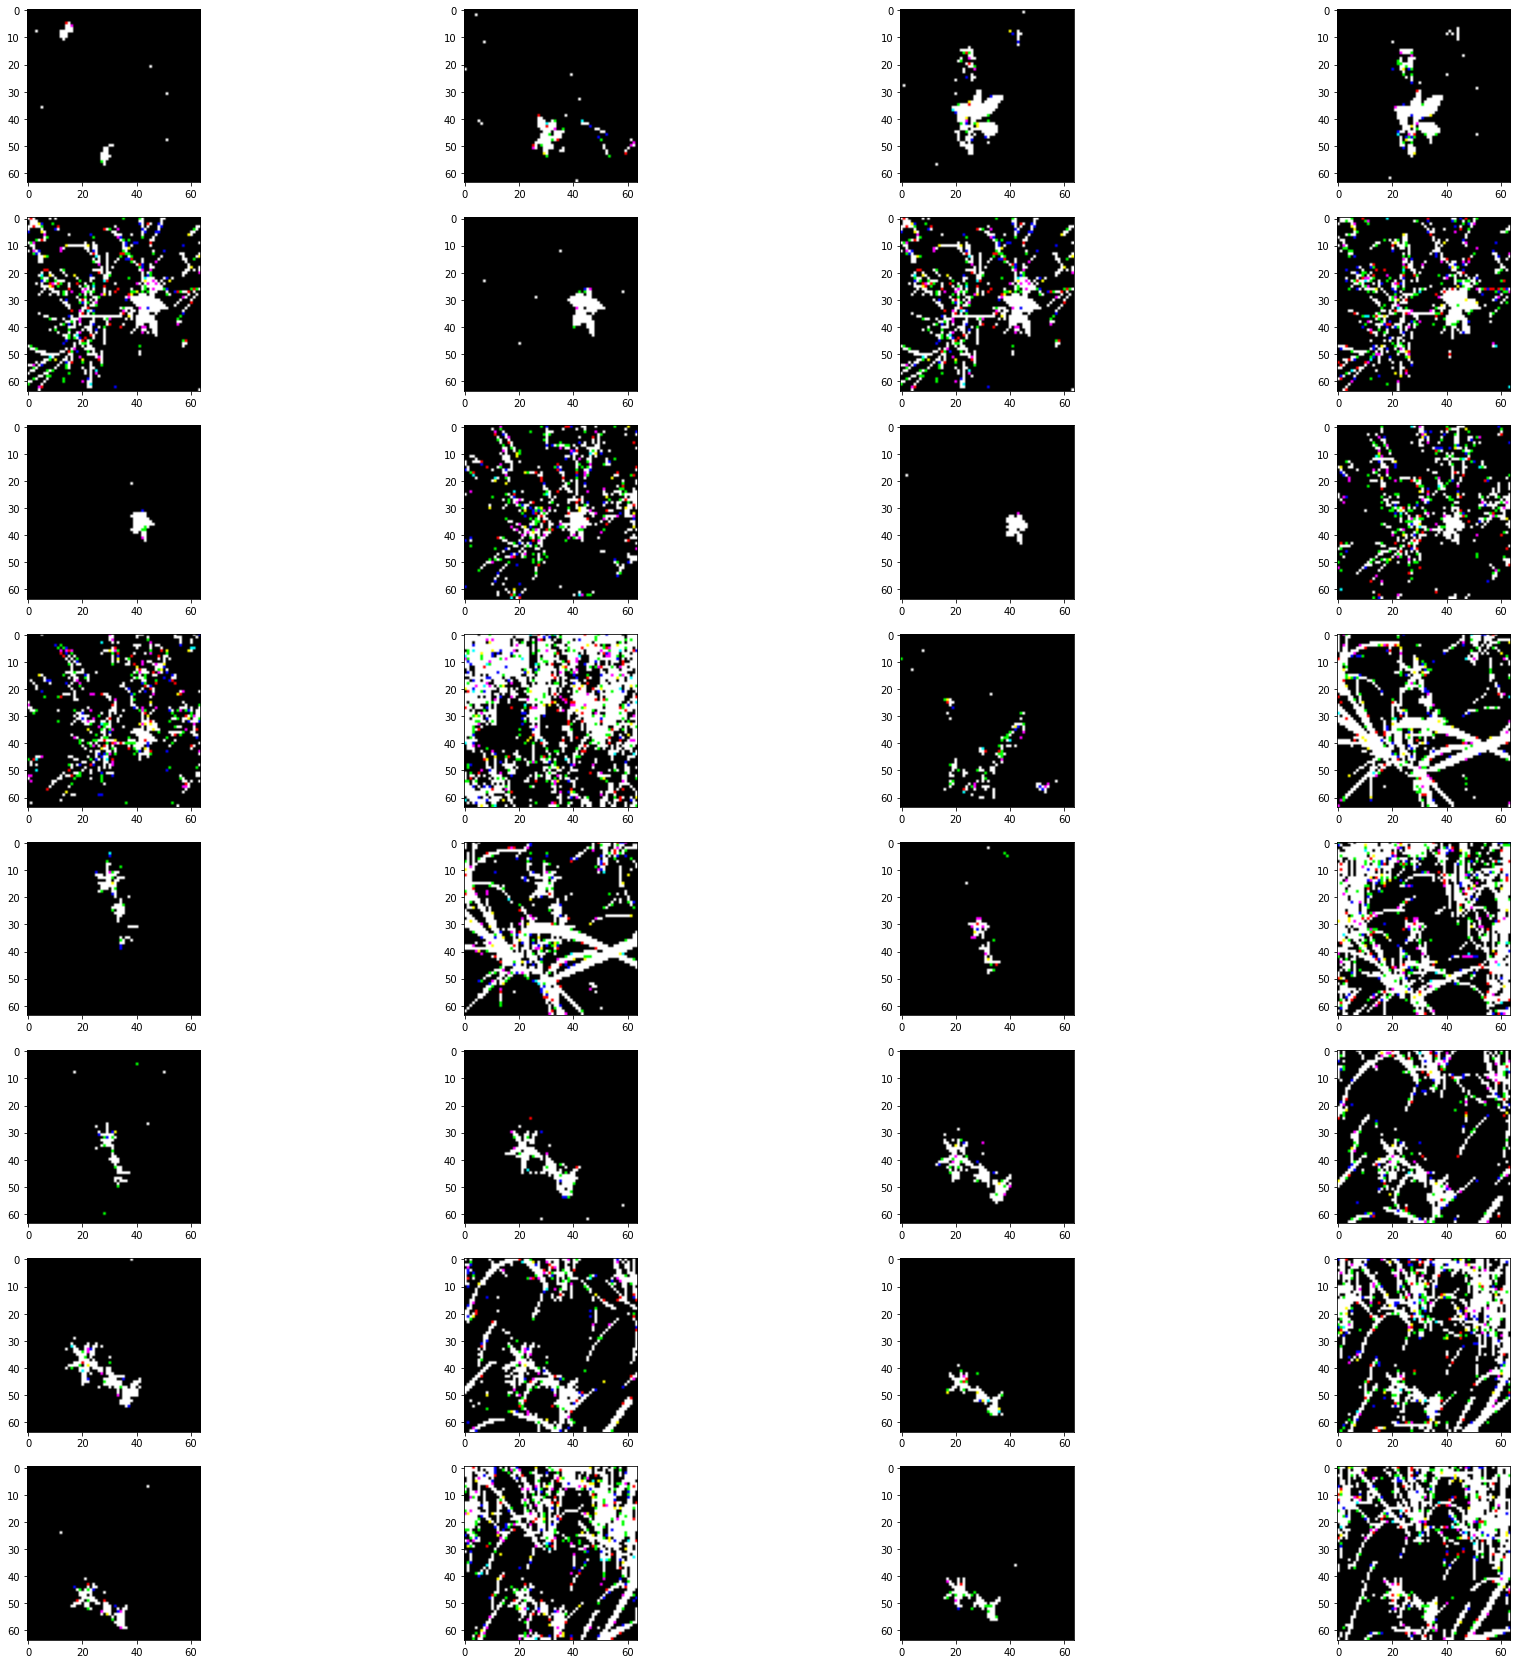

In [ ]:
plt.figure()
f, axarr = plt.subplots(8,4,figsize=(30,30))


k = 0
for i in range (0,8):
  for j in range(0,4):
    axarr[i][j].imshow(X[k])
    k+=1


In [ ]:
#predicted labels
predicted_val = np.argmax(prediction, axis=1)
print(predicted_val)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#SET2
#take a batch of dataset 
X,y = testdata.next()
prediction = model.predict(X)
print(X.shape)
print(y)#truelabel
print(prediction) #predictval

(32, 64, 64, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[9.99970078e-01 5.89654610e-06 2.40561076e-05]
 [8.43432188e-01 1.41317561e-01 1.52502861e-02]
 [9.99889970e-01 3.51492417e-07 1.09700435e-04]
 [9.99987483e-01 6.47902141e-07 1.19508250e-05]
 [9.99945760e-01 7.95196016e-08 5.40812216e-05]
 [9.11688089e-01 8.39481652e-02 4.36378550e-03]
 [9.99998808e-01 7.95878119e-09 1.19068716e-06]
 [7.97856599e-03 9.89209592e-01 2.81187356e-03]
 [4.49865103e-01 5.40747166e-01 9.38771199e-03]
 [5.21273911e-01 4.38737541e-01 3.99886072e-02]
 [3.20387274e-01 6.37411177e-01 4.22014631e-02]
 [2.10403472e-01 7.76540339e-01 1.30561795e-02]
 [2.47176155e-01 7.5170

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

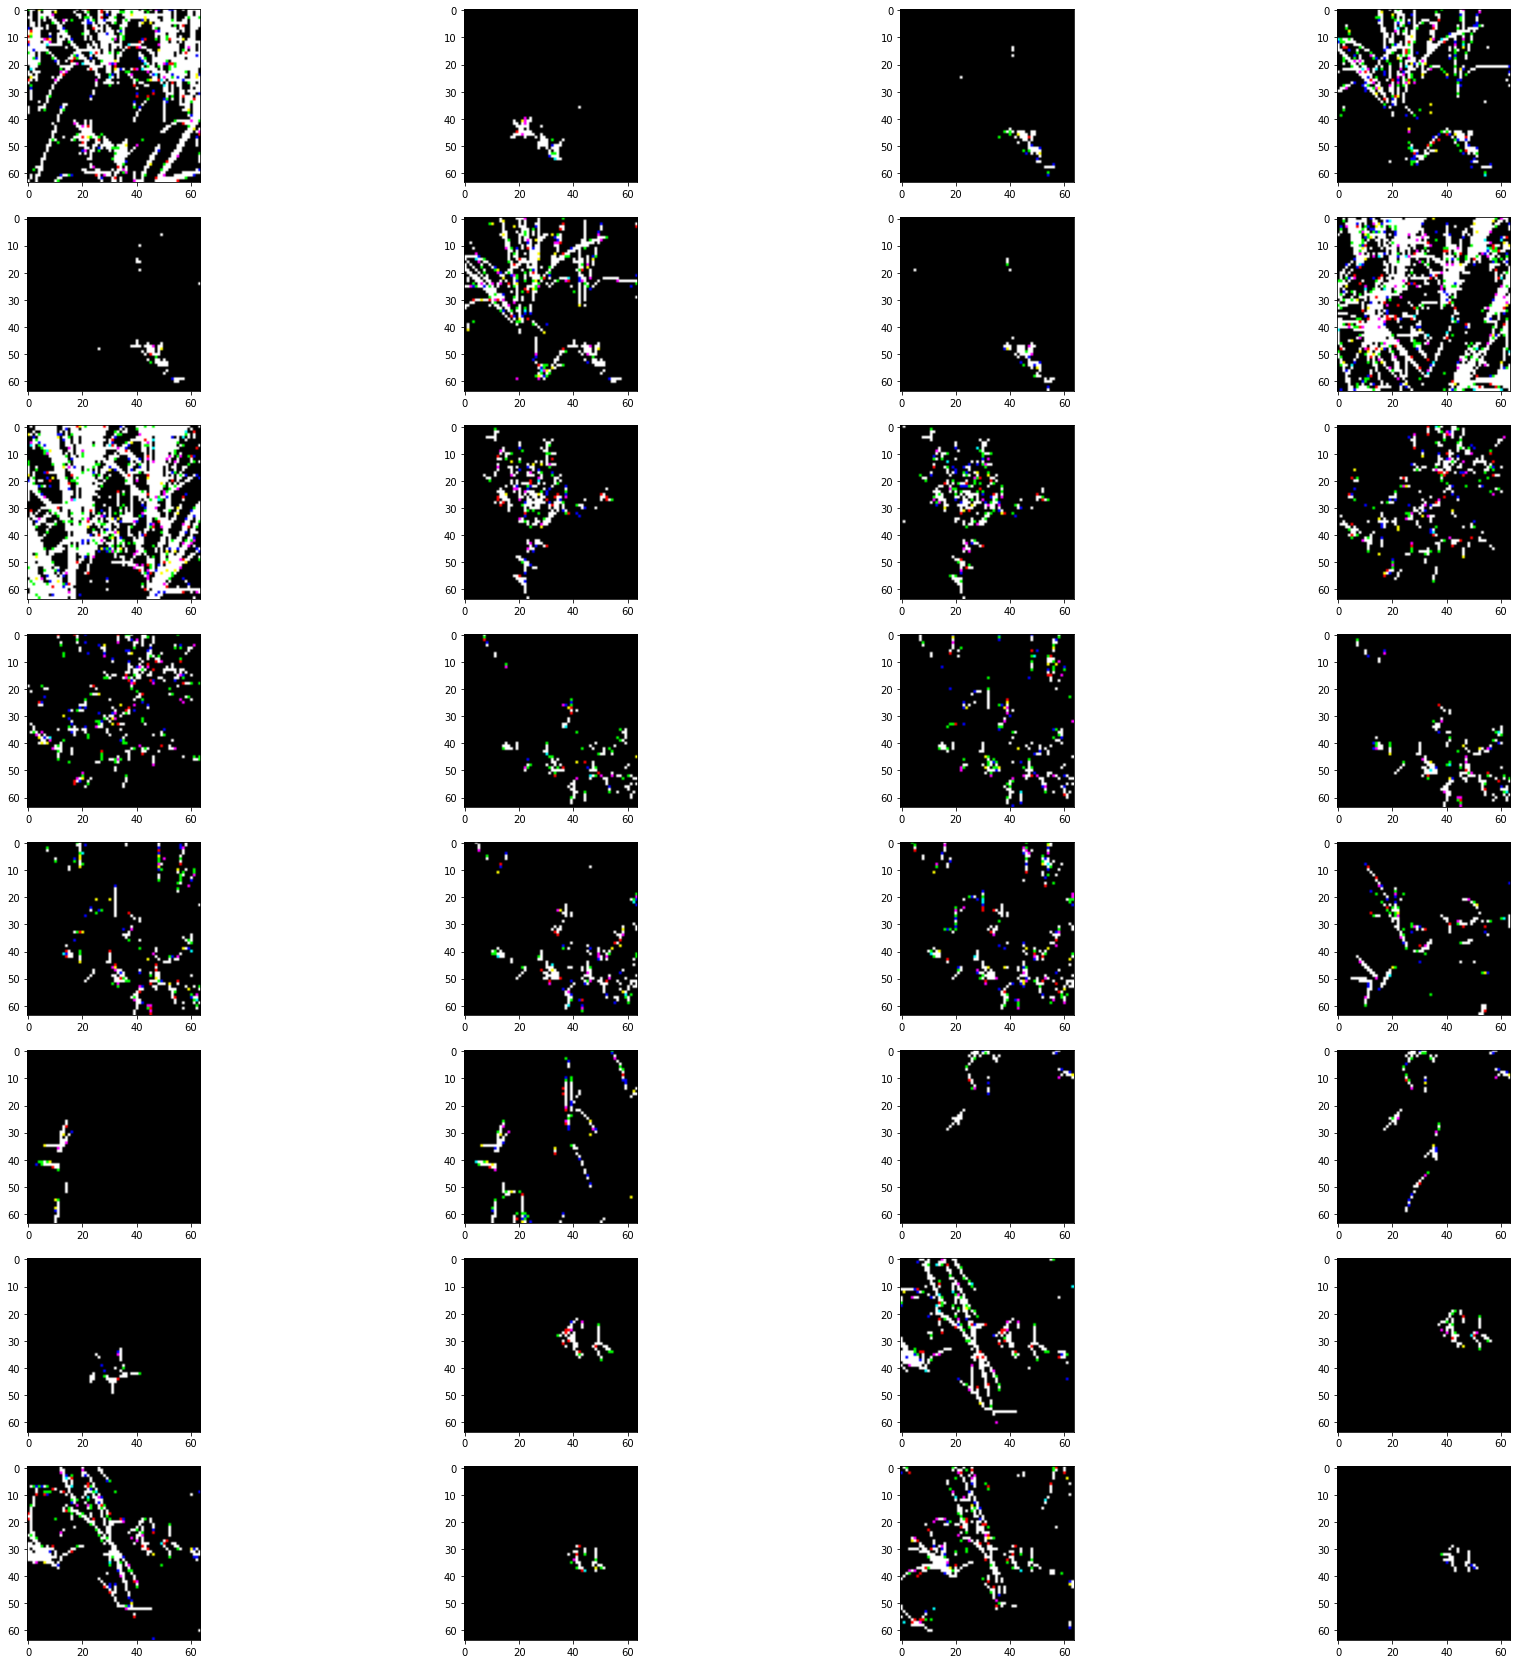

In [ ]:
plt.figure()
f, axarr = plt.subplots(8,4,figsize=(30,30))


k = 0
for i in range (0,8):
  for j in range(0,4):
    axarr[i][j].imshow(X[k])
    k+=1

In [ ]:
#predicted labels
predicted_val = np.argmax(prediction, axis=1)
print(predicted_val)

[0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1]


In [ ]:

#take a batch of dataset 
X,y = testdata.next()
prediction = model.predict(X)
print(X.shape)
print(y)#truelabel
print(prediction) #predictval

(32, 64, 64, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[2.7589271e-05 5.5054232e-04 9.9942183e-01]
 [1.4812097e-10 2.2403480e-11 1.0000000e+00]
 [6.4086461e-01 3.4358865e-01 1.5546726e-02]
 [9.9675337e-12 1.6555099e-10 1.0000000e+00]
 [5.6303620e-02 8.6099482e-01 8.2701541e-02]
 [1.1417119e-01 8.1574410e-01 7.0084728e-02]
 [1.1417119e-01 8.1574410e-01 7.0084728e-02]
 [4.4077504e-05 3.4102140e-04 9.9961483e-01]
 [4.3169755e-01 4.5092839e-01 1.1737400e-01]
 [6.3270872e-06 1.1717420e-05 9.9998200e-01]
 [3.6475813e-01 3.8194904e-01 2.5329280e-01]
 [1.6473978e-05 9.9927980e-01 7.0378685e-04]
 [3.6503836e-05 1.6528545e-01 8.3467805e-01]
 [1.0586393e-0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

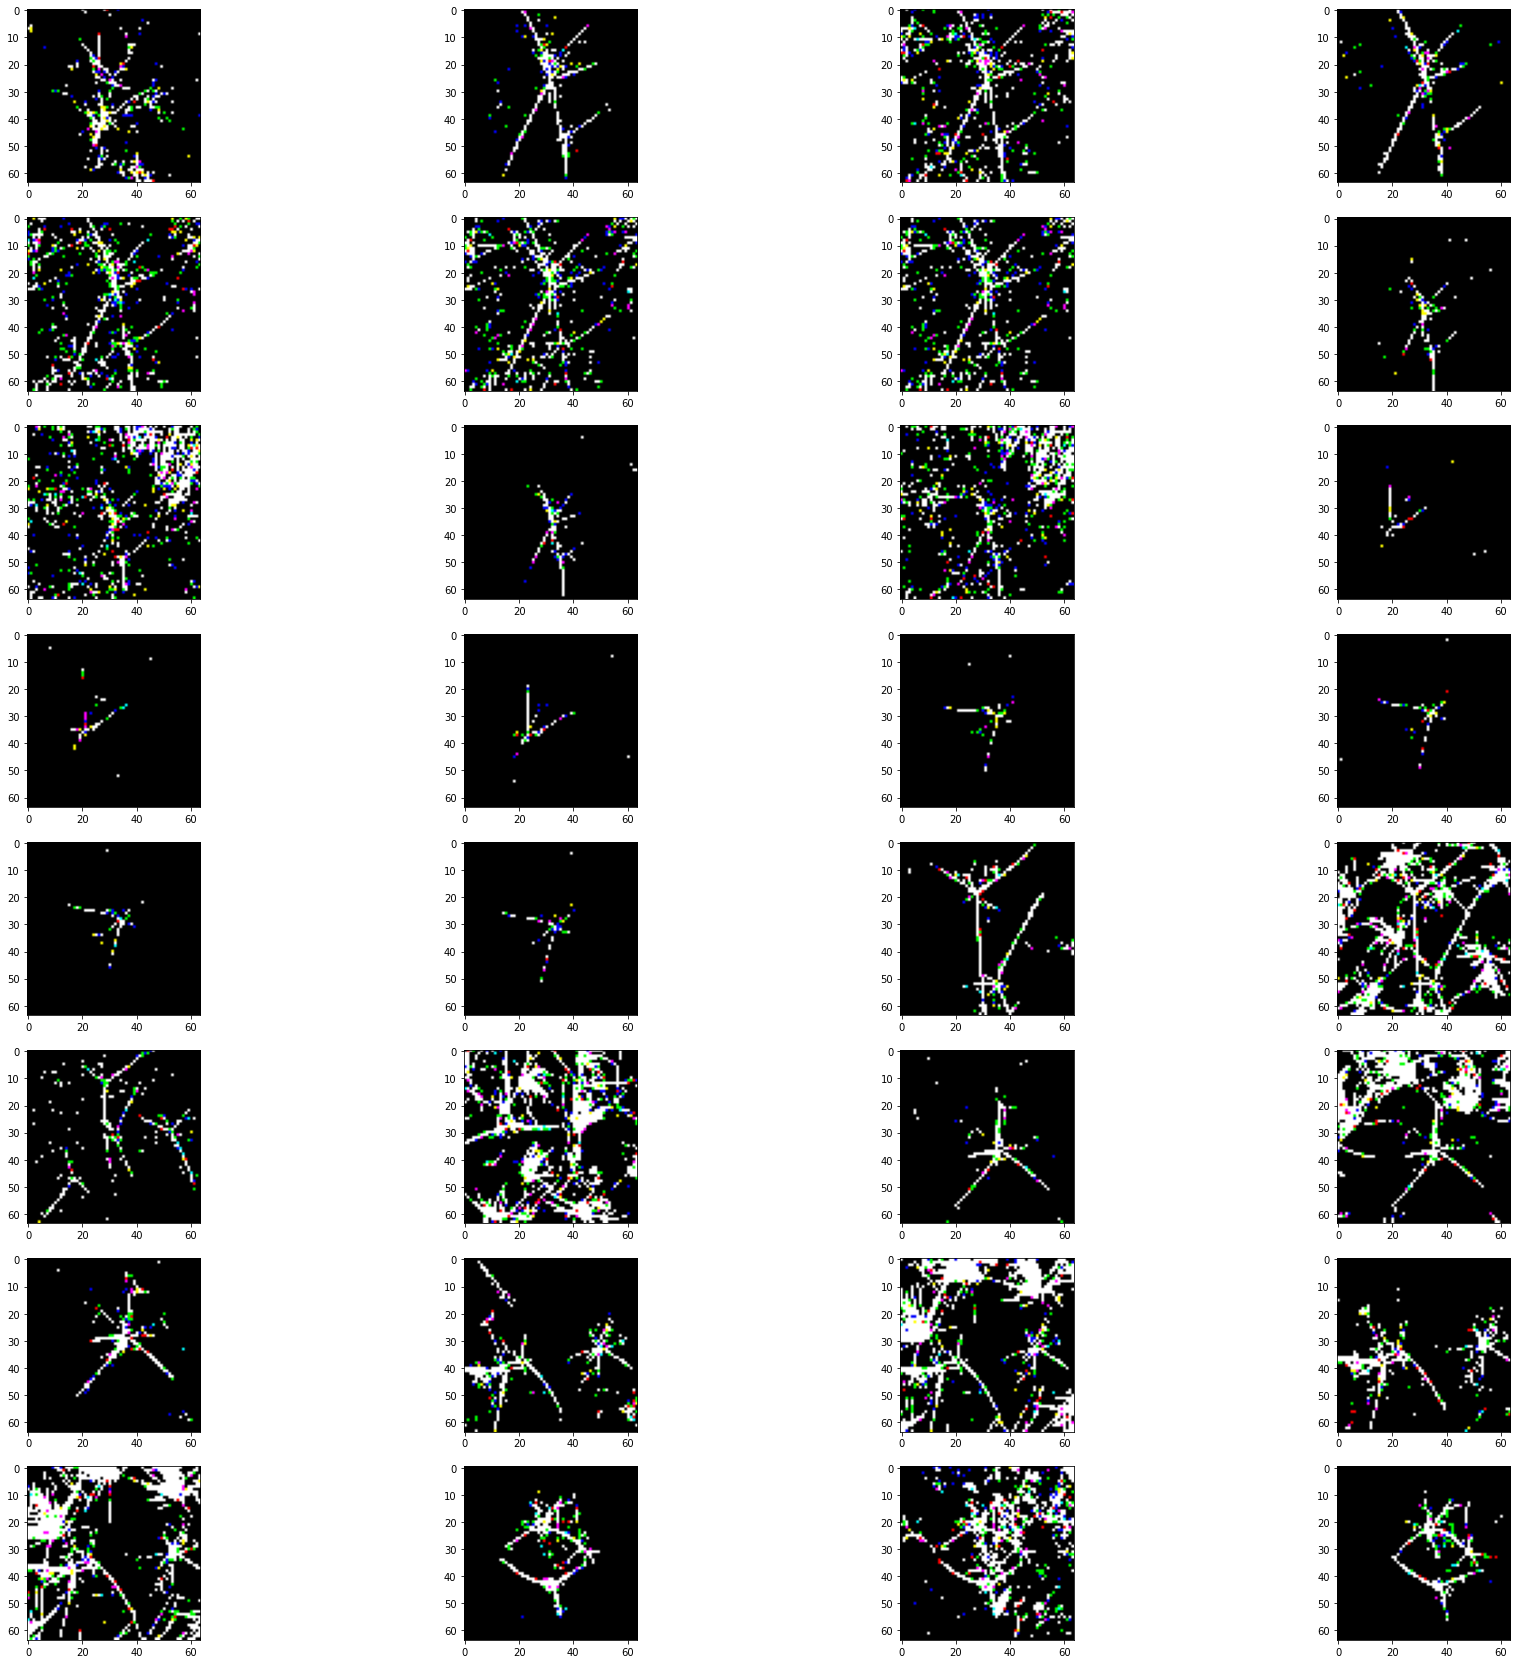

In [ ]:
plt.figure()
f, axarr = plt.subplots(8,4,figsize=(30,30))

k = 0
for i in range (0,8):
  for j in range(0,4):
    axarr[i][j].imshow(X[k])
    k+=1

In [ ]:
#predicted labels
predicted_val = np.argmax(prediction, axis=1)
print(predicted_val)

[2 2 0 2 1 1 1 2 1 2 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
